# **DATA ANALYSIS**

- Tasks :

- Improvement of the Upfront Pricing Precision

- Identification of Key features/Opportunities for such improvement 

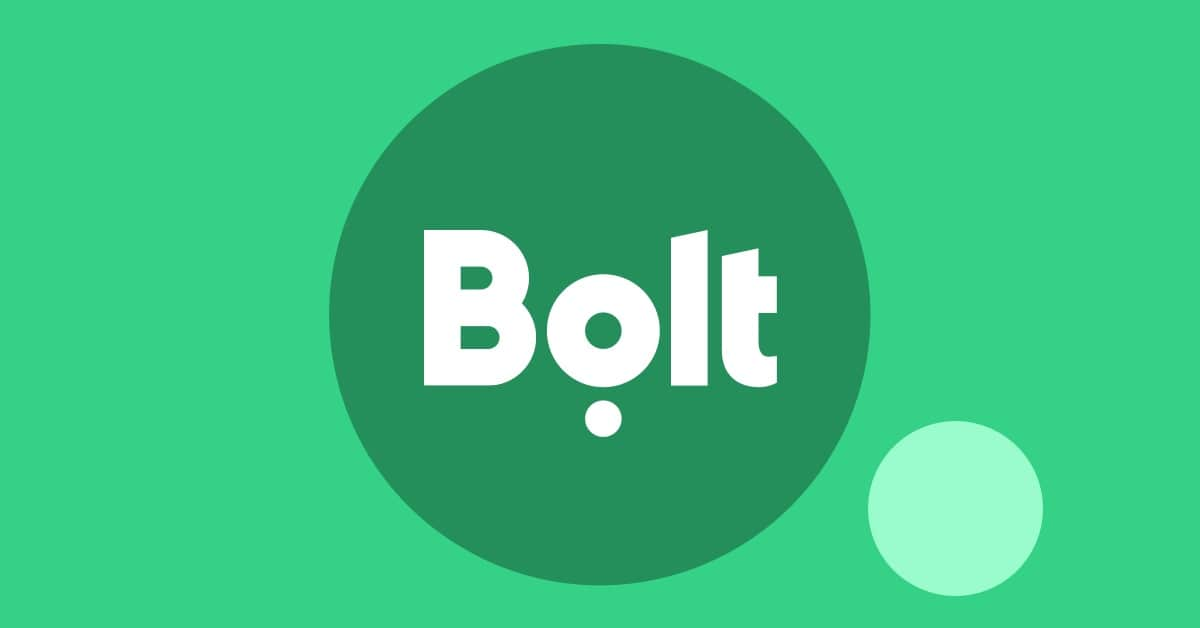

# **Table of Content** 

- SECTION A: *Importations*

  - Data Importation and Date fixings

- SECTION B: *Expository Data Analysis*

  - Data Descriptive Analysis

  - Data Cleaning

  - Feature Engineering

  - Data Splitting for Analysis

  

- SECTION C: Features' Evaluation

  - GPS Confidence

  - Destination Change

  - Distance & Pred Distance

  - Duration & Pred Duration

  - EU Indicators

  - Order Time

  - App Versions

  - Features' Correlation

- Section D: Conclusions


# Section A

# Import

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt_dt
from matplotlib import collections as matcoll

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
          ##Import test  Data
Billing_df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data Science Projects/Billing_data.csv")
Billing_df.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,1376,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,2035,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,2222,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,1788,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,2710,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [ ]:
print(Billing_df.shape)
Billing_df.dtypes

(4943, 26)


order_id_new               int64
order_try_id_new           int64
calc_created              object
metered_price            float64
upfront_price            float64
distance                   int64
duration                   int64
gps_confidence             int64
entered_by                object
b_state                   object
dest_change_number         int64
prediction_price_type     object
predicted_distance       float64
predicted_duration       float64
change_reason_pricing     object
ticket_id_new              int64
device_token             float64
rider_app_version         object
order_state               object
order_try_state           object
driver_app_version        object
driver_device_uid_new      int64
device_name               object
eu_indicator               int64
overpaid_ride_ticket       int64
fraud_score              float64
dtype: object

# Section B : Expository Data Analysis



## Data Descriptive Analysis

In [ ]:
                                                             #Dataset Information Table for each colum
Data_Dict= pd.DataFrame(Billing_df.dtypes)                   #Datatype of each column
Data_Dict['Missing Val'] = Billing_df.isnull().sum()         #Num of missing values, add to table
Data_Dict['% Missing val'] = round((Data_Dict['Missing Val'].astype(int)/Billing_df.shape[0] * 100),2)
Data_Dict['Num of Zeros'] = (Billing_df == 0).sum(0)
Data_Dict['% Num of Zeros'] = round((Data_Dict['Num of Zeros'].astype(int)/Billing_df.shape[0] * 100),2)
Data_Dict['nUnique Values']= Billing_df.nunique()             #Num of unique entries, add to table
Data_Dict=Data_Dict.rename(columns={0:'Datatype'})
print('The Table below shows the Data Information of each column ')
print('Data Shape: ', Billing_df.shape)

Data_Dict

The Table below shows the Data Information of each column 
Data Shape:  (4943, 26)


,Datatype,Missing Val,% Missing val,Num of Zeros,% Num of Zeros,nUnique Values
order_id_new,int64,0,0.00,1,0.02,4166
order_try_id_new,int64,0,0.00,1,0.02,4166
calc_created,object,0,0.00,0,0.00,4165
metered_price,float64,20,0.40,0,0.00,2395
upfront_price,float64,1534,31.03,0,0.00,289
distance,int64,0,0.00,64,1.29,3661
duration,int64,0,0.00,25,0.51,2308
gps_confidence,int64,0,0.00,985,19.93,2
entered_by,object,0,0.00,0,0.00,3
b_state,object,0,0.00,0,0.00,1


- From the table above:

- 31% of the upfront price data is missing 

- Features with very high missing value percentages and single unique value will be dropped 

- Description of Numerical Features 

In [ ]:
Billing_df.describe()

,order_id_new,order_try_id_new,metered_price,upfront_price,distance,duration,gps_confidence,dest_change_number,predicted_distance,predicted_duration,ticket_id_new,device_token,driver_device_uid_new,eu_indicator,overpaid_ride_ticket,fraud_score
count,4943.000000,4943.000000,4923.000000,3409.000000,4943.000000,4943.000000,4943.000000,4943.000000,4923.000000,4923.000000,4943.000000,0.0,4943.000000,4943.000000,4943.000000,2184.000000
mean,2061.074449,2061.074044,7998.471296,4160.095747,9769.223144,1566.230629,0.800728,1.119361,8822.636807,1106.737355,2471.000000,NaN,1093.311349,0.560388,0.068177,-674.046703
std,1199.298429,1199.299081,15815.850352,17015.711912,10912.426401,1650.329858,0.399493,0.499611,10548.801733,806.098535,1427.065521,NaN,626.408069,0.496390,0.252075,1119.189890
min,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,-14225.000000
25%,1020.500000,1020.500000,5.380000,4.200000,3785.500000,604.000000,1.000000,1.000000,4130.500000,597.500000,1235.500000,NaN,561.500000,0.000000,0.000000,-826.500000
50%,2065.000000,2065.000000,13.350000,6.600000,7140.000000,1054.000000,1.000000,1.000000,6918.000000,939.000000,2471.000000,NaN,1088.000000,1.000000,0.000000,-278.500000
75%,3090.500000,3090.500000,10991.670000,4000.000000,11953.000000,1929.500000,1.000000,1.000000,10674.000000,1427.000000,3706.500000,NaN,1643.000000,1.000000,0.000000,-64.750000
max,4165.000000,4165.000000,194483.520000,595000.000000,233190.000000,22402.000000,1.000000,12.000000,353538.000000,20992.000000,4942.000000,NaN,2158.000000,1.000000,1.000000,49.000000


## Data Cleaning

- Dropping non-informative columns

- Columns with: ids, single unique value, high missing values...

In [ ]:
             ##Dropping non-informative columns... 
Billing_df = Billing_df.drop(['order_id_new','order_try_id_new','b_state','ticket_id_new','order_state',
                              'order_try_state','device_token','driver_device_uid_new','fraud_score'],axis=1)

print(Billing_df.shape)
Billing_df.head()

(4943, 17)


,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,rider_app_version,driver_app_version,device_name,eu_indicator,overpaid_ride_ticket
0,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,1,upfront,13384.0,1091.0,NaN,CI.4.17,DA.4.37,Xiaomi Redmi 6,1,0
1,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,1,upfront,2286.0,360.0,NaN,CA.5.43,DA.4.39,Samsung SM-G965F,1,0
2,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,1,upfront,4101.0,433.0,NaN,CA.5.43,DA.4.37,Samsung SM-A530F,1,0
3,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,CA.5.23,DA.4.37,TECNO-Y6,0,1
4,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,1,upfront,14236.0,2778.0,NaN,CA.5.04,DA.4.37,Itel W5504,0,0


In [ ]:
print(len(Billing_df.columns))
Billing_df.columns

17


Index(['calc_created', 'metered_price', 'upfront_price', 'distance',
       'duration', 'gps_confidence', 'entered_by', 'dest_change_number',
       'prediction_price_type', 'predicted_distance', 'predicted_duration',
       'change_reason_pricing', 'rider_app_version', 'driver_app_version',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket'],
      dtype='object')

- Handling Missing Values

In [ ]:
                                             #get data Where metered_price "is not null" (20 rows ignored)
Billing_DF = Billing_df[Billing_df['metered_price'].notna()]      
                                             #replace Nan in "upfront_price" with mean values
Billing_DF['upfront_price']= Billing_DF['upfront_price'].fillna(Billing_DF['upfront_price'].mean())

                                             #replace Nan in "change_reason_pricing" with "No Effect"
                                             #Empty entries means changes does not affect prediction
Billing_DF['change_reason_pricing'] = Billing_DF['change_reason_pricing'].replace(np.nan, 'No Effect', regex=True)

In [ ]:
                  #checking if missing values is properly handled
print(Billing_DF.shape)
Billing_DF.isnull().sum()

(4923, 17)


calc_created             0
metered_price            0
upfront_price            0
distance                 0
duration                 0
gps_confidence           0
entered_by               0
dest_change_number       0
prediction_price_type    0
predicted_distance       0
predicted_duration       0
change_reason_pricing    0
rider_app_version        0
driver_app_version       0
device_name              0
eu_indicator             0
overpaid_ride_ticket     0
dtype: int64

## Feature Engineering 

- Creating new columns: 

-  **1: Percentage price difference** :
  - between the "metered price" and the "upfront price"


-  **2: Hourbased Time** :
  - The hour within which the order was made

 **1: Percentage price difference** :

In [ ]:
                              ##Adding a new column for the "perentage difference in prices..."
Billing_DF['%_Price_Diff'] = (abs(Billing_DF['metered_price'] - Billing_DF['upfront_price'])/Billing_DF['metered_price']) *100  
Billing_DF = Billing_DF[['calc_created','metered_price','upfront_price','%_Price_Diff','distance','duration','gps_confidence',
            'entered_by', 'dest_change_number','prediction_price_type', 'predicted_distance', 'predicted_duration',
            'change_reason_pricing', 'rider_app_version','driver_app_version','device_name', 'eu_indicator',
            'overpaid_ride_ticket']]

Billing_DF[['calc_created','metered_price','upfront_price','%_Price_Diff','distance','duration','gps_confidence']]        

,calc_created,metered_price,upfront_price,%_Price_Diff,distance,duration,gps_confidence
0,2020-02-02 3:37:31,4.04,10.000000,147.524752,2839,700,1
1,2020-02-08 2:26:19,6.09,3.600000,40.886700,5698,493,1
2,2020-02-08 11:50:35,4.32,3.500000,18.981481,4426,695,1
3,2020-02-05 6:34:54,72871.72,4160.095747,94.291207,49748,1400,0
4,2020-02-13 17:31:24,20032.50,19500.000000,2.658180,10273,5067,1
...,...,...,...,...,...,...,...
4938,2020-03-07 17:42:34,10.89,13.700000,25.803489,15672,1449,1
4939,2020-02-22 18:15:45,8789.28,4160.095747,52.668526,5712,1173,0
4940,2020-03-12 23:08:31,7.50,7.400000,1.333333,5303,486,1
4941,2020-03-08 20:15:04,3.06,8.100000,164.705882,3528,338,1


In [ ]:
print(len(Billing_DF.columns))
Billing_DF.columns

18


Index(['calc_created', 'metered_price', 'upfront_price', '%_Price_Diff',
       'distance', 'duration', 'gps_confidence', 'entered_by',
       'dest_change_number', 'prediction_price_type', 'predicted_distance',
       'predicted_duration', 'change_reason_pricing', 'rider_app_version',
       'driver_app_version', 'device_name', 'eu_indicator',
       'overpaid_ride_ticket'],
      dtype='object')

-  **2: Hourbased Time** :

In [ ]:
                          #Convert date to timestamp
Billing_DF['Timestamp'] = pd.to_datetime(Billing_DF['calc_created'])
Billing_DF = Billing_DF[['Timestamp','metered_price','upfront_price','%_Price_Diff','distance','duration','gps_confidence',
            'entered_by', 'dest_change_number','prediction_price_type', 'predicted_distance', 'predicted_duration',
            'change_reason_pricing', 'rider_app_version','driver_app_version', 'device_name','eu_indicator',
            'overpaid_ride_ticket']]

Billing_DF[['Timestamp','metered_price','upfront_price','%_Price_Diff','distance','predicted_distance',
            'duration','predicted_duration','gps_confidence']].head(3)        



,Timestamp,metered_price,upfront_price,%_Price_Diff,distance,predicted_distance,duration,predicted_duration,gps_confidence
0,2020-02-02 03:37:31,4.04,10.0,147.524752,2839,13384.0,700,1091.0,1
1,2020-02-08 02:26:19,6.09,3.6,40.886700,5698,2286.0,493,360.0,1
2,2020-02-08 11:50:35,4.32,3.5,18.981481,4426,4101.0,695,433.0,1


In [ ]:
                      ##Convert date to Weekly Based: Timestamp::
def get_hour(r):
  r = dt_dt.strftime(r, '%H')
  return r

Billing_DF['Hourbased_Time'] = Billing_DF['Timestamp'].apply(get_hour)
Billing_DF[['Timestamp','Hourbased_Time','metered_price','upfront_price','%_Price_Diff','distance','predicted_distance',
            'duration','predicted_duration','gps_confidence']].head()        

,Timestamp,Hourbased_Time,metered_price,upfront_price,%_Price_Diff,distance,predicted_distance,duration,predicted_duration,gps_confidence
0,2020-02-02 03:37:31,03,4.04,10.000000,147.524752,2839,13384.0,700,1091.0,1
1,2020-02-08 02:26:19,02,6.09,3.600000,40.886700,5698,2286.0,493,360.0,1
2,2020-02-08 11:50:35,11,4.32,3.500000,18.981481,4426,4101.0,695,433.0,1
3,2020-02-05 06:34:54,06,72871.72,4160.095747,94.291207,49748,3017.0,1400,600.0,0
4,2020-02-13 17:31:24,17,20032.50,19500.000000,2.658180,10273,14236.0,5067,2778.0,1


In [ ]:
print("Min Timestamp: ", Billing_DF['Timestamp'].min())
print("Max Timestamp: ", Billing_DF['Timestamp'].max())

Min Timestamp:  2020-02-02 00:01:16
Max Timestamp:  2020-03-13 23:52:07


 ## Data Splitting

- Splitting Data into two(2) catergories based on **%_Price_Diff** 

  - Rides whose *%_Price_Diff* falls within the 20% difference are considered to be in the "**SamePrice_DF** "

  - Rides whose *%_Price_Diff* are more than the 20% difference are considered to be in the "**DiffPrice_DF** "

In [ ]:
Same_PriceDF = Billing_DF[Billing_DF['%_Price_Diff'] <= 20.00]
print(Same_PriceDF.shape)
Same_PriceDF.head()

(2071, 19)


,Timestamp,metered_price,upfront_price,%_Price_Diff,distance,duration,gps_confidence,entered_by,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,rider_app_version,driver_app_version,device_name,eu_indicator,overpaid_ride_ticket,Hourbased_Time
2,2020-02-08 11:50:35,4.32,3.5,18.981481,4426,695,1,client,1,upfront,4101.0,433.0,No Effect,CA.5.43,DA.4.37,Samsung SM-A530F,1,0,11
4,2020-02-13 17:31:24,20032.50,19500.0,2.658180,10273,5067,1,client,1,upfront,14236.0,2778.0,No Effect,CA.5.04,DA.4.37,Itel W5504,0,0,17
5,2020-02-14 01:27:01,6.11,6.3,3.109656,4924,513,1,client,1,upfront,4882.0,562.0,No Effect,CA.5.04,DA.4.39,HUAWEI WAS-LX1,1,0,01
10,2020-02-24 08:51:31,8.04,8.1,0.746269,9977,1257,1,client,1,upfront,9891.0,1282.0,No Effect,CA.5.44,DA.4.39,HUAWEI BLA-L29,1,0,08
13,2020-03-05 18:52:48,7.65,6.3,17.647059,13355,1335,1,client,1,upfront,11823.0,888.0,No Effect,CA.5.32,DI.3.37,"iPhone9,3",1,0,18


In [ ]:
Diff_PriceDF = Billing_DF[Billing_DF['%_Price_Diff'] > 20.00]
print(Diff_PriceDF.shape)
Diff_PriceDF.head()

(2852, 19)


,Timestamp,metered_price,upfront_price,%_Price_Diff,distance,duration,gps_confidence,entered_by,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,rider_app_version,driver_app_version,device_name,eu_indicator,overpaid_ride_ticket,Hourbased_Time
0,2020-02-02 03:37:31,4.04,10.000000,147.524752,2839,700,1,client,1,upfront,13384.0,1091.0,No Effect,CI.4.17,DA.4.37,Xiaomi Redmi 6,1,0,03
1,2020-02-08 02:26:19,6.09,3.600000,40.886700,5698,493,1,client,1,upfront,2286.0,360.0,No Effect,CA.5.43,DA.4.39,Samsung SM-G965F,1,0,02
3,2020-02-05 06:34:54,72871.72,4160.095747,94.291207,49748,1400,0,client,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,CA.5.23,DA.4.37,TECNO-Y6,0,1,06
6,2020-02-09 06:51:20,20753.20,10500.000000,49.405393,10459,1874,1,client,1,upfront,4892.0,698.0,No Effect,CI.4.17,DA.4.19,TECNO MOBILE LIMITED TECNO KA7O,0,0,06
7,2020-02-17 18:24:45,2.61,6.500000,149.042146,2020,412,1,client,1,upfront,8545.0,888.0,No Effect,CI.4.18,DA.4.37,Samsung SM-N950F,1,0,18


#Section C: Feature Evaluations

- I will be approching this task using the features' evaluation technique.

- I will be analysing the two catergories of data (SamePrice_DF & DiffPrice_df)

  -  Based on specific choice of individual features and how their behaviours varies in the two data sets

  - This will give an insight on the features that directly 


## GPS Confidence

In [ ]:
print("% Distribution of 'gps_confidence' for rides with Different Prices")
print(Diff_PriceDF['gps_confidence'].value_counts(normalize=True)*100)
print()
print("% Distribution of 'gps_confidence' for rides with Same Prices")
print(Same_PriceDF['gps_confidence'].value_counts(normalize=True)*100)


% Distribution of 'gps_confidence' for rides with Different Prices
1    69.880785
0    30.119215
Name: gps_confidence, dtype: float64

% Distribution of 'gps_confidence' for rides with Same Prices
1    94.012554
0     5.987446
Name: gps_confidence, dtype: float64


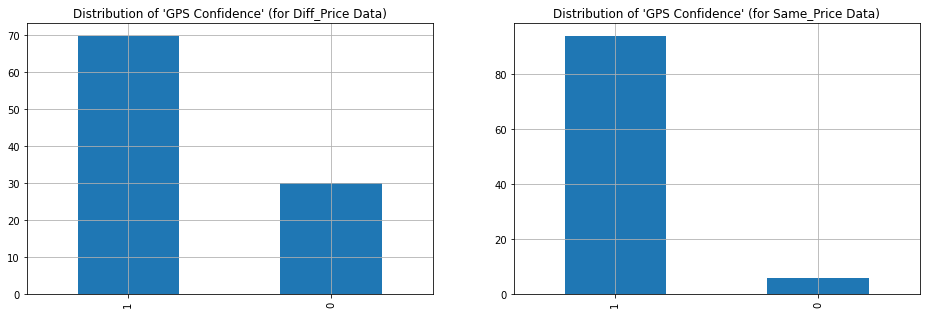

In [ ]:
plt.subplots(figsize=(16, 5))  

plt.subplot(1, 2, 1)  
(Diff_PriceDF['gps_confidence'].value_counts(normalize=True)*100).plot.bar()
plt.title("Distribution of 'GPS Confidence' (for Diff_Price Data)")
plt.grid()

plt.subplot(1, 2, 2) 
(Same_PriceDF['gps_confidence'].value_counts(normalize=True)*100).plot.bar()
plt.title("Distribution of 'GPS Confidence' (for Same_Price Data)")
plt.grid()

- The **GPS_Confidence** at the time the prediction was made has an impact on the prediction procedure

  - Approximately 30% of rides with different prices (of metered and predicted amount) have a bad GPS connection during the prediction.

  - Conversely, about 6% of rides with same prices have bad GPS connection

## Desination Change

In [ ]:
print("Analysis of Destination Change values for 'DiffPrice' Data...")
print(Diff_PriceDF['dest_change_number'].value_counts()) 
print("-----------------------------------------")
print()
print("Num of destination input made once: ",Diff_PriceDF['dest_change_number'].value_counts().values[0])
print("%  of destination input made once : ", (Diff_PriceDF['dest_change_number'].value_counts().values[0]/Diff_PriceDF.shape[0])*100)
print("-----------------------------------------")
print()
print("Num of destination change > 1:  ",Diff_PriceDF['dest_change_number'].value_counts().values[1:].sum())
print("%  of destination change  > 1 : ", (Diff_PriceDF['dest_change_number'].value_counts().values[1:].sum()/Diff_PriceDF.shape[0])*100)


Analysis of Destination Change values for 'DiffPrice' Data...
1     2523
2      224
3       73
4       17
5        9
7        2
6        2
9        1
12       1
Name: dest_change_number, dtype: int64
-----------------------------------------

Num of destination input made once:  2523
%  of destination input made once :  88.46423562412342
-----------------------------------------

Num of destination change > 1:   329
%  of destination change  > 1 :  11.535764375876578


In [ ]:
print("Analysis of Destination Change values for 'SamePrice' Data...")
print(Same_PriceDF['dest_change_number'].value_counts()) 
print("-----------------------------------------")
print()
print("Num of destination input made once: ",Same_PriceDF['dest_change_number'].value_counts().values[0])
print("%  of destination input made once : ", (Same_PriceDF['dest_change_number'].value_counts().values[0]/Same_PriceDF.shape[0])*100)
print("-----------------------------------------")
print()
print("Num of destination change > 1:  ",Same_PriceDF['dest_change_number'].value_counts().values[1:].sum())
print("%  of destination change  > 1 : ", (Same_PriceDF['dest_change_number'].value_counts().values[1:].sum()/Same_PriceDF.shape[0])*100)

Analysis of Destination Change values for 'SamePrice' Data...
1    2017
2      32
3      16
5       3
4       3
Name: dest_change_number, dtype: int64
-----------------------------------------

Num of destination input made once:  2017
%  of destination input made once :  97.39256397875423
-----------------------------------------

Num of destination change > 1:   54
%  of destination change  > 1 :  2.6074360212457752


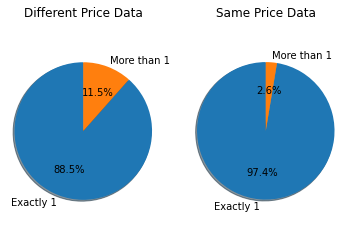

In [ ]:
#plt.figure(figsize=(15,5))
fig, (ax1,ax2)=plt.subplots(1,2)
labels='Exactly 1','More than 1'
sizes=[88.46,11.54]
ax1.pie(sizes,
        labels=labels,
       startangle=90,
        shadow=True,
        autopct='%1.1f%%')
ax1.axis('equal')
ax1.set_title('Different Price Data')

labels_='Exactly 1','More than 1'
sizes_=[97.39,2.61]
ax2.pie(sizes_,
        labels=labels_,
       startangle=90,
        shadow=True,
        autopct='%1.1f%%')
ax2.axis('equal')
ax2.set_title('Same Price Data')
plt.show()

- The **Number of Destination Change** made during the ride also has an impact on the prediction procedure:

  - More Rides with ~Different Prices has their destination changed more than once ..
  
  - as compared to rides that has ~same prices (of metered and predicted amount)) 
  
  

## Distance & Pred Distance

In [ ]:
x_list = list(range(0,2071))
distDf_Sameprice = Same_PriceDF.sort_values('distance')[['distance','predicted_distance']]
#distDf_Sameprice['Gap_diff'] = abs(distDf_Sameprice['distance']-distDf_Sameprice['predicted_distance'])

xlist_2 = list(range(0,2852))
distDf_Diffprice = Diff_PriceDF.sort_values('distance')[['distance','predicted_distance']]
#distDf_Diffprice['Gap_diff'] = abs(distDf_Diffprice['distance']-distDf_Diffprice['predicted_distance'])

distDf_Diffprice

,distance,predicted_distance
521,0,11130.0
2581,0,9411.0
2571,0,12384.0
4724,0,8131.0
3274,0,9411.0
...,...,...
3575,84420,10791.0
2695,86340,86112.0
1188,123934,11922.0
4811,132018,105347.0


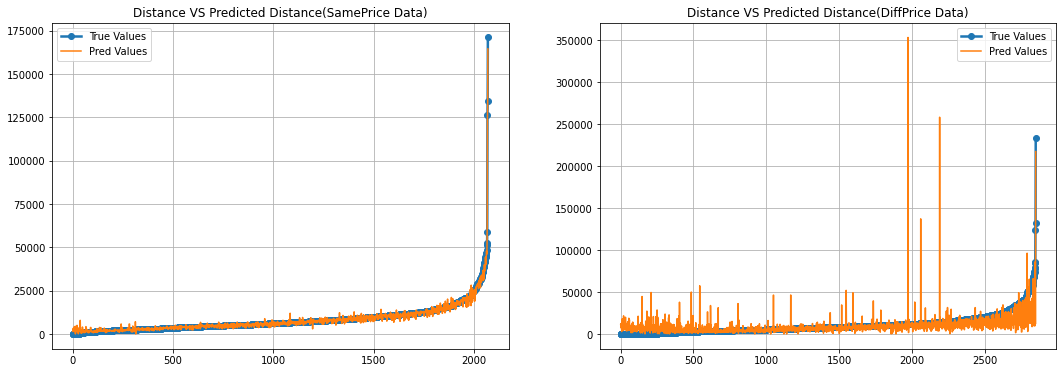

In [ ]:
plt.subplots(figsize=(18, 6))  

plt.subplot(1, 2, 1)  
plt.plot(x_list,distDf_Sameprice['distance'],linewidth=2.5,marker='o',label='True Values')
plt.plot(x_list,distDf_Sameprice['predicted_distance'],label='Pred Values')
#plt.plot(x_list,distDf_Sameprice['Gap_diff'],label='Gap Diff')

plt.title("Distance VS Predicted Distance(SamePrice Data)")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(xlist_2,distDf_Diffprice['distance'],linewidth=2.5,marker='o',label='True Values')
plt.plot(xlist_2,distDf_Diffprice['predicted_distance'],label='Pred Values')
#plt.plot(xlist_2,distDf_Diffprice['Gap_diff'],label='Gap Diff')

plt.title("Distance VS Predicted Distance(DiffPrice Data)")
plt.grid()
plt.legend()

## Duration & Pred Duration

In [ ]:
durationDf_Sameprice = Same_PriceDF.sort_values('duration')[['duration','predicted_duration']]
#durationDf_Sameprice['Gap_diff'] = abs(durationDf_Sameprice['duration']-durationDf_Sameprice['predicted_duration'])


durationDf_DiffPrice = Diff_PriceDF.sort_values('duration')[['duration','predicted_duration']]
#durationDf_DiffPrice['Gap_diff'] = abs(durationDf_DiffPrice['duration']-durationDf_DiffPrice['predicted_duration'])

distDf_Sameprice

,distance,predicted_distance
2065,0,1430.0
2096,0,1610.0
1475,0,3287.0
2907,0,2110.0
1463,0,1944.0
...,...,...
2773,52387,52197.0
1068,58927,67650.0
2352,126657,125384.0
2033,134498,131873.0


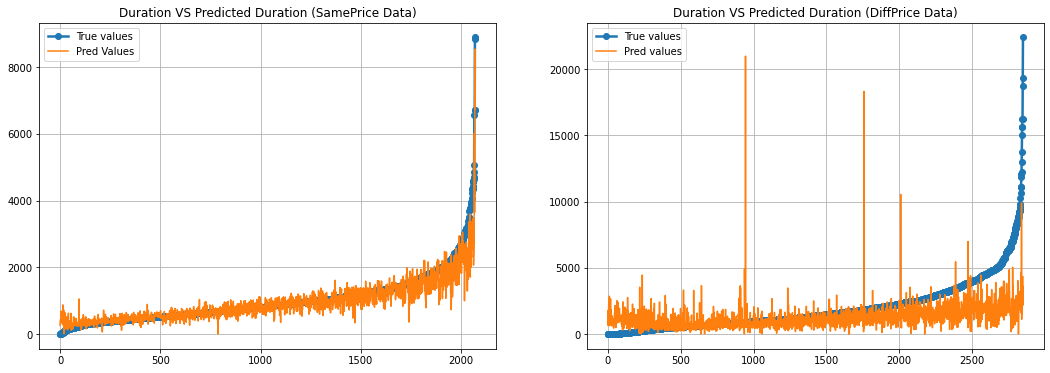

In [ ]:
plt.subplots(figsize=(18, 6))  

plt.subplot(1, 2, 1)  
plt.plot(x_list,durationDf_Sameprice['duration'],linewidth=2.5,marker='o',label='True values')
plt.plot(x_list,durationDf_Sameprice['predicted_duration'],label='Pred Values')
#plt.plot(x_list,durationDf_Sameprice['Gap_diff'],label='Gap Diff')

plt.title("Duration VS Predicted Duration (SamePrice Data)")
plt.grid()
plt.legend()

plt.subplot(1, 2, 2) 
plt.plot(xlist_2,durationDf_DiffPrice['duration'],linewidth=2.5,marker='o',label='True values')
plt.plot(xlist_2,durationDf_DiffPrice['predicted_duration'],label='Pred values')
#plt.plot(xlist_2,durationDf_DiffPrice['Gap_diff'],label='Gap Diff')

plt.title("Duration VS Predicted Duration (DiffPrice Data)")
plt.grid()
plt.legend()

- The "**Distance VS Predicted Distance**" and "**Duration VS Predicted Duration**" 

-  There are much more gap difference between the actual and predicted distances for the DiffPrice_DF. 

- A similar trend is shown for the evaluation of the  Duration vs Predicted Duration;   
        
- This shows that if the predicted distances and duration are as close enough to the actual distances and duration, then the upfront prices will have a high precision.

## EU Indicators

In [ ]:
print(Billing_DF['eu_indicator'].value_counts(normalize=True)*100)

1    55.860248
0    44.139752
Name: eu_indicator, dtype: float64


In [ ]:
print(Same_PriceDF['eu_indicator'].value_counts(normalize=True)*100) 

1    80.202801
0    19.797199
Name: eu_indicator, dtype: float64


In [ ]:
print(Diff_PriceDF['eu_indicator'].value_counts(normalize=True)*100)

0    61.816269
1    38.183731
Name: eu_indicator, dtype: float64


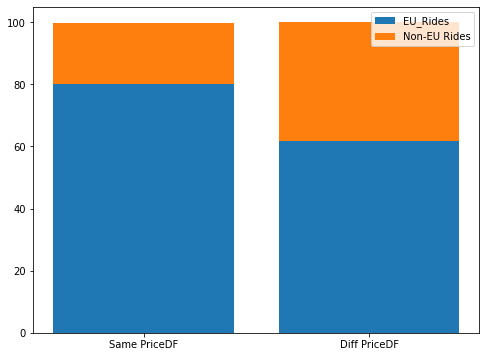

In [ ]:
x = ['Same PriceDF', 'Diff PriceDF']
y1 = [80.02, 61.81]
y2 = [19.80, 38.18]
  
#Plot bars in stack 
plt.figure(figsize=(8,6))
plt.bar(x, y1)
plt.bar(x, y2, bottom=y1)
#plt.grid()
plt.legend(['EU_Rides','Non-EU Rides'])
plt.show()

- The Location of ride shows an effect on the predicted price.

- More rides that occured in the EU have same price range.

## Order Time

- Evaluation of rides based on the hour of the day the order was made

In [ ]:
Billing_DF.head()

,calc_created,metered_price,upfront_price,%_Price_Diff,distance,duration,gps_confidence,entered_by,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,rider_app_version,driver_app_version,order_state,order_try_state,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,2020-02-02 3:37:31,4.04,10.0,147.524752,2839,700,1,client,1,upfront,13384.0,1091.0,NaN,CI.4.17,DA.4.37,finished,finished,Xiaomi Redmi 6,1,0,-1383.0
1,2020-02-08 2:26:19,6.09,3.6,40.886700,5698,493,1,client,1,upfront,2286.0,360.0,NaN,CA.5.43,DA.4.39,finished,finished,Samsung SM-G965F,1,0,NaN
2,2020-02-08 11:50:35,4.32,3.5,18.981481,4426,695,1,client,1,upfront,4101.0,433.0,NaN,CA.5.43,DA.4.37,finished,finished,Samsung SM-A530F,1,0,-166.0
3,2020-02-05 6:34:54,72871.72,NaN,NaN,49748,1400,0,client,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,CA.5.23,DA.4.37,finished,finished,TECNO-Y6,0,1,NaN
4,2020-02-13 17:31:24,20032.50,19500.0,2.658180,10273,5067,1,client,1,upfront,14236.0,2778.0,NaN,CA.5.04,DA.4.37,finished,finished,Itel W5504,0,0,NaN


In [ ]:
df1 = pd.DataFrame(Same_PriceDF['Hourbased_Time'].value_counts()).reset_index().sort_values('index')
df1.reset_index(drop=True)

,index,Hourbased_Time
0,00,74
1,01,76
2,02,52
3,03,65
4,04,39
5,05,52
6,06,93
7,07,84
8,08,74
9,09,86


In [ ]:
df_2 = pd.DataFrame(Diff_PriceDF['Hourbased_Time'].value_counts()).reset_index().sort_values('index')
df_2.reset_index(drop=True)

,index,Hourbased_Time
0,00,27
1,01,26
2,02,39
3,03,20
4,04,26
5,05,24
6,06,69
7,07,74
8,08,43
9,09,70


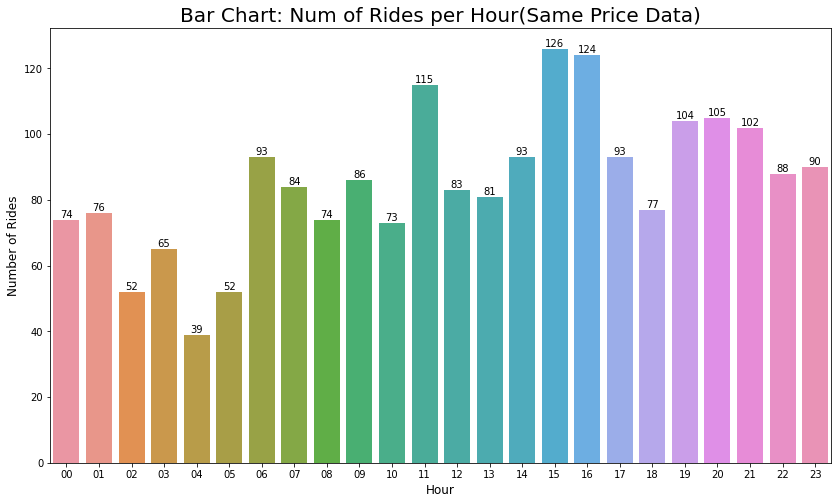

In [ ]:
plt.figure(figsize=(14,8))
ax =sns.barplot(df1['index'],df1['Hourbased_Time'])
x_locs,x_lables = plt.xticks()
#plt.setp(x_lables, rotation=60)     ##rotating the x_lables
plt.title("Bar Chart: Num of Rides per Hour(Same Price Data)", fontsize=20)
plt.ylabel("Number of Rides", fontsize=12)
plt.xlabel("Hour",fontsize=12)

                  #adding text lables...
r = ax.patches
labels = df1['Hourbased_Time']
for rec,label in zip(r,labels):
  height = rec.get_height()
  ax.text(rec.get_x() + rec.get_width()/2,
          height,
          label,
          ha='center',
          va='bottom')

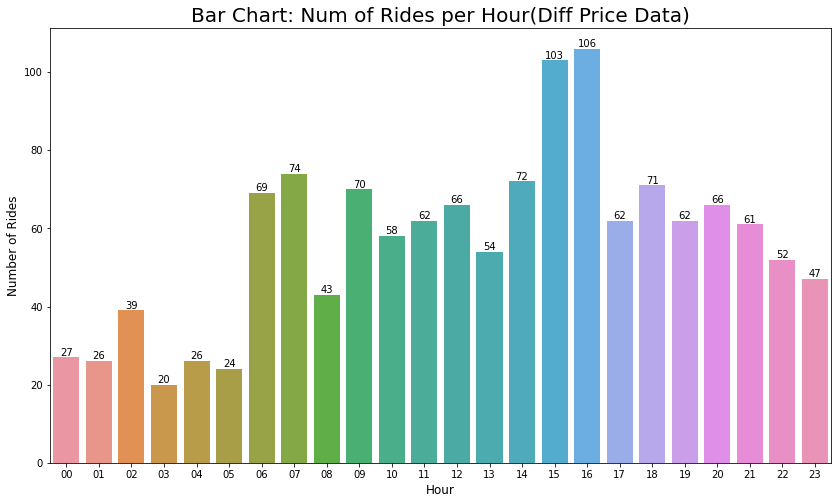

In [ ]:
plt.figure(figsize=(14,8))
ax =sns.barplot(df_2['index'],df_2['Hourbased_Time'])
x_locs,x_lables = plt.xticks()
#plt.setp(x_lables, rotation=60)     ##rotating the x_lables
plt.title("Bar Chart: Num of Rides per Hour(Diff Price Data)", fontsize=20)
plt.ylabel("Number of Rides", fontsize=12)
plt.xlabel("Hour",fontsize=12)
#plt.grid()

                  #adding text lables...
r = ax.patches
labels = df_2['Hourbased_Time']
for rec,label in zip(r,labels):
  height = rec.get_height()
  ax.text(rec.get_x() + rec.get_width()/2,
          height,
          label,
          ha='center',
          va='bottom')

- A closely similar trend in observed for both sets of data.

- Therefor this feature does not have a strong influence on upfront pricing

## App Version

In [ ]:
(Billing_DF['rider_app_version'].value_counts(normalize=True)*100)[:5]

CI.4.17    14.645541
CI.4.19    12.675198
CA.5.44    11.375178
CA.5.43     8.247004
CA.5.42     7.414178
Name: rider_app_version, dtype: float64

In [ ]:
(Same_PriceDF['rider_app_version'].value_counts(normalize=True)*100)[:5]

CI.4.17    17.769194
CI.4.19    13.085466
CA.5.44    10.864317
CA.5.43    10.140029
CA.5.42     7.774022
Name: rider_app_version, dtype: float64

In [ ]:
(Diff_PriceDF['rider_app_version'].value_counts(normalize=True)*100)[:5] 

CI.4.19    12.377279
CI.4.17    12.377279
CA.5.44    11.746143
CA.5.42     7.152875
CA.5.43     6.872370
Name: rider_app_version, dtype: float64

In [ ]:
(Same_PriceDF['driver_app_version'].value_counts(normalize=True)*100)[:5] 

DA.4.39    32.206663
DA.4.37    22.211492
DA.4.42    14.099469
DA.4.31     6.663448
DA.4.34     5.552873
Name: driver_app_version, dtype: float64

In [ ]:
(Diff_PriceDF['driver_app_version'].value_counts(normalize=True)*100)[:5] s

DA.4.39    31.591865
DA.4.37    18.863955
DA.4.42    17.812062
DA.4.34     6.065919
DA.4.31     5.014025
Name: driver_app_version, dtype: float64

- A closely similar trend in observed for both sets of data.

- Therefor the App versions by both riders and drivers do not have a strong influence on upfront pricing

## Features' Correlation

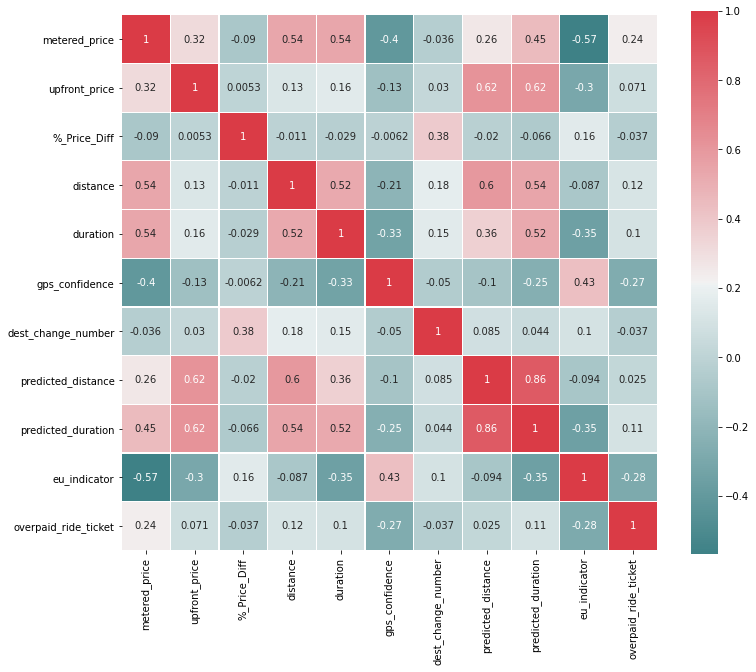

In [ ]:
#plot the heatmap by using the correlation for the dataset. 
f,ax=plt.subplots(figsize=(12,10))
sns.heatmap(Billing_DF.corr(),linewidths=0.2, vmax=1.0, square=True,cmap=sns.diverging_palette(200,10, as_cmap=True),
            ax=ax,annot=True)

- Evaluation of features' correlations to pick top opportunities/features that directly influence the upfront price;
      
- Top features which correlate positively with the *upfront price* are;

- the *Predicted distance* and the *Predicted duration* (0.62 correlation value)

# Section D: Conclusion

- The following conclusions can be drawn from the full analytical task done on the provided data ;

- The top features that can directly help to improve  the upfront pricing are;   
     
  -  **Predicted Distance and Predicted Duration**: The correlation results shows that a high precision in the predicted Distance and Duration results in a very high precision in the Upfront Price,
  
 - It is therefore the top opportunity for improvement. If more accurate predictions of distance and duration are made, a corresponding high accuracy will be recorded in the upfront pricing.
        
        
- Other important features include;
 
 - GPS Confidence
        
 - Number of Destination Changes
         
 - EU-Indicator